In [16]:
pip install FuzzyTM

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --user --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pydub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install librosa


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install librosa pydub soundfile audioread


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import scipy.signal
import os
from scipy.io import wavfile


from pydub import AudioSegment
from pydub.utils import mediainfo
 

In [2]:

# Function to read audio files from a folder named Read_Audio
def read_audio_from_folder(Read_Audio):
    audio_data = []
    for file_name in os.listdir(Read_Audio):
        file_path = os.path.join(Read_Audio, file_name)
        if os.path.isfile(file_path) and file_name.endswith('.wav'):
            audio, sr = librosa.load(file_path, sr=None)  # Load audio file
            audio_data.append((audio, sr))
    return audio_data



In [3]:
import scipy.signal

def filter_audio(audio_data, cutoff_freq=2000, filter_type='lowpass'):
    filtered_audio_data = []
    for audio, sr in audio_data:
        # Apply filtering
        if filter_type == 'lowpass':
            nyquist = sr / 2
            cutoff_normal = cutoff_freq / nyquist
            b, a = scipy.signal.butter(6, cutoff_normal, btype='low')
            filtered_audio = scipy.signal.filtfilt(b, a, audio)
        elif filter_type == 'highpass':
            nyquist = sr / 2
            cutoff_normal = cutoff_freq / nyquist
            b, a = scipy.signal.butter(6, cutoff_normal, btype='high')
            filtered_audio = scipy.signal.filtfilt(b, a, audio)
        else:
            raise ValueError("Unsupported filter type. Supported types: 'lowpass', 'highpass'")
        filtered_audio_data.append((filtered_audio, sr))
    return filtered_audio_data



In [4]:
# Function to save filtered audio to new files
        
def save_filtered_audio(filtered_audio_data, Filtered_Audio):
    for i, (audio, sr) in enumerate(filtered_audio_data):
        output_path = os.path.join(Filtered_Audio, f'filtered_audio_{i}.wav')
        wavfile.write(output_path, sr, audio)


In [5]:
# Example usage

Read_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy'
Filtered_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy'




In [9]:
# Example to check read and write permissions
def check_permissions(path):
    print("Read permission on", path, ":", os.access(path, os.R_OK))
    print("Write permission on", path, ":", os.access(path, os.W_OK))

check_permissions(Read_Audio)
check_permissions(Filtered_Audio)


Read permission on C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy : True
Write permission on C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy : True
Read permission on C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy : True
Write permission on C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy : True


In [10]:
import os
import pandas as pd

Read_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy' 
filtered_audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy'

def check_directory(path):
    if os.path.exists(path):
        files = os.listdir(path)
        df = pd.DataFrame(files, columns=['File Name'])
        print("Files in", path, "directory:")
        print(df)
        print("Count of files in", path, ":", len(files))
    else:
        print(path, "directory does not exist.")

# Check the specified directories
check_directory(Read_Audio)
check_directory(Filtered_Audio)


Files in C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy directory:
             File Name
0        Windy (1).wav
1       Windy (10).wav
2      Windy (100).wav
3     Windy (1000).wav
4     Windy (1001).wav
...                ...
2687   Windy (995).wav
2688   Windy (996).wav
2689   Windy (997).wav
2690   Windy (998).wav
2691   Windy (999).wav

[2692 rows x 1 columns]
Count of files in C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy : 2692
Files in C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy directory:
Empty DataFrame
Columns: [File Name]
Index: []
Count of files in C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy : 0


In [14]:
import os

Read_Audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy'
filtered_audio = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Clean\Windy'

# Function to check the directory and print details
def check_directory(path):
    if os.path.exists(path):
        files = os.listdir(path)
        print("Files in", path, "directory:", files)
        print("Count of files in", path, ":", len(files))
    else:
        print(path, "directory does not exist.")

# Check the specified directories
check_directory(Read_Audio)
check_directory(Filtered_Audio)


Files in C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\Raw\Windy directory: ['Windy (1).wav', 'Windy (10).wav', 'Windy (100).wav', 'Windy (1000).wav', 'Windy (1001).wav', 'Windy (1002).wav', 'Windy (1003).wav', 'Windy (1004).wav', 'Windy (1005).wav', 'Windy (1006).wav', 'Windy (1007).wav', 'Windy (1008).wav', 'Windy (1009).wav', 'Windy (101).wav', 'Windy (1010).wav', 'Windy (1011).wav', 'Windy (1012).wav', 'Windy (1013).wav', 'Windy (1014).wav', 'Windy (1015).wav', 'Windy (1016).wav', 'Windy (1017).wav', 'Windy (1018).wav', 'Windy (1019).wav', 'Windy (102).wav', 'Windy (1020).wav', 'Windy (1021).wav', 'Windy (1022).wav', 'Windy (1023).wav', 'Windy (1024).wav', 'Windy (1025).wav', 'Windy (1026).wav', 'Windy (1027).wav', 'Windy (1028).wav', 'Windy (1029).wav', 'Windy (103).wav', 'Windy (1030).wav', 'Windy (1031).wav', 'Windy (1032).wav', 'Windy (1033).wav', 'Windy (1034).wav', 'Windy (1035).wav', 'Windy (1036).wav', 'Windy (1037).wav', 'Wi

In [15]:
# Read audio files from folder
audio_data = read_audio_from_folder(Read_Audio)

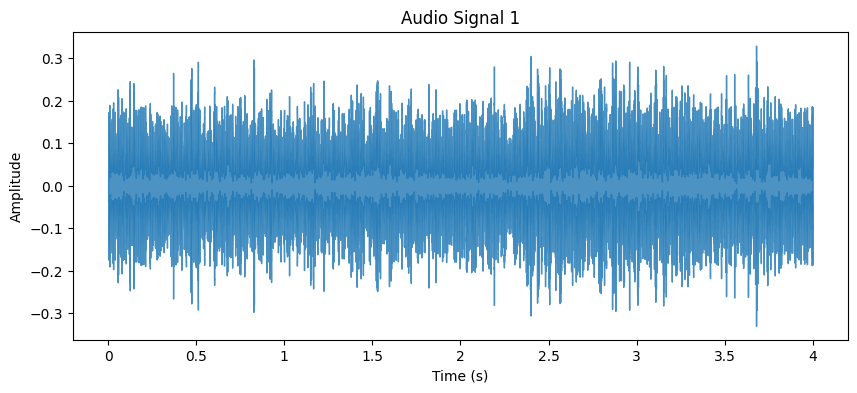

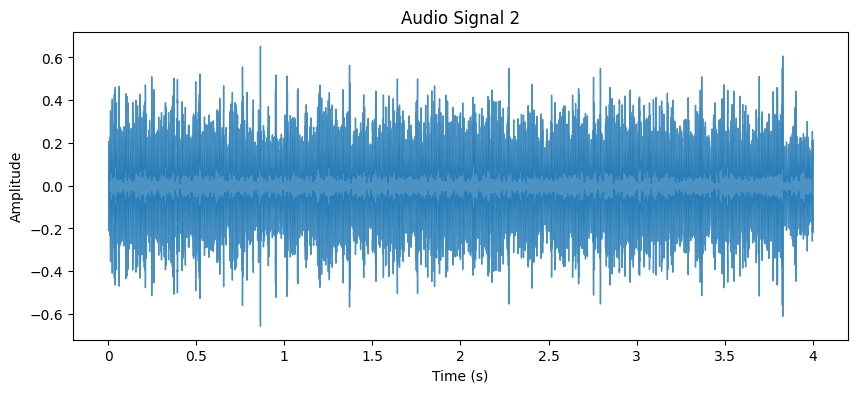

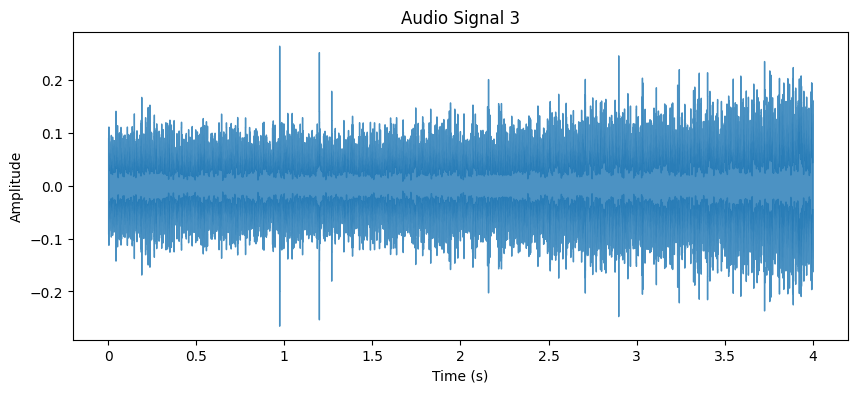

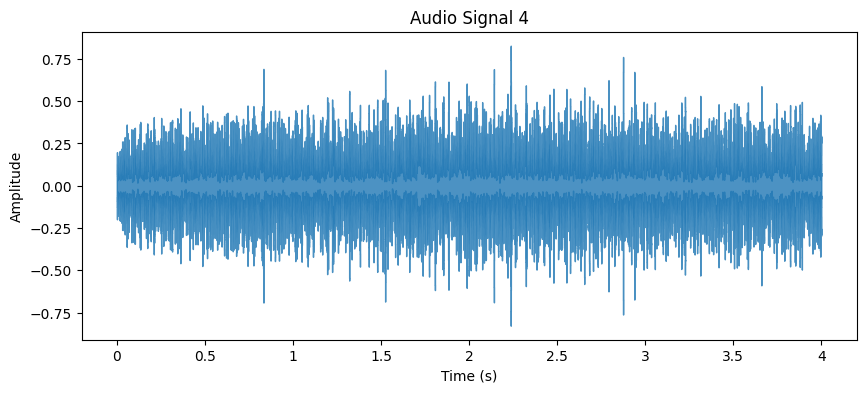

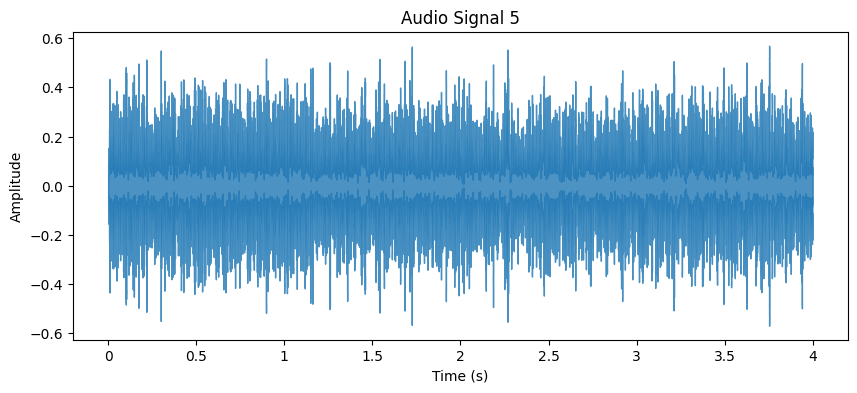

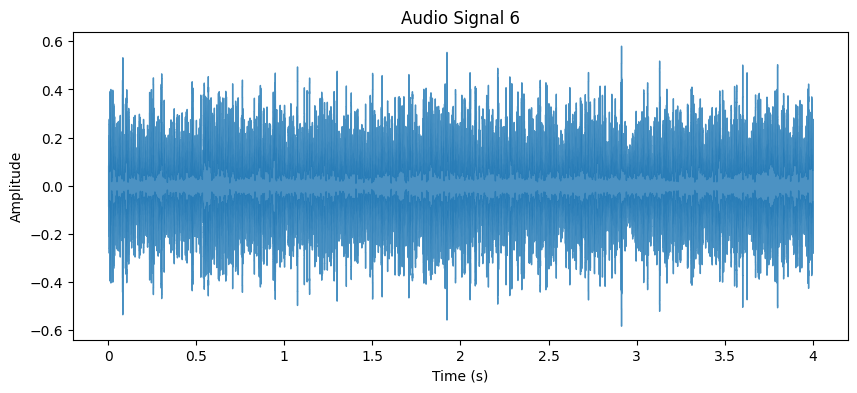

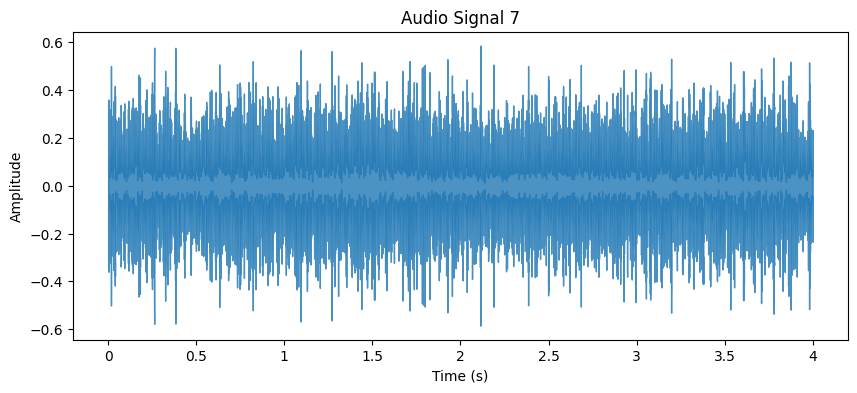

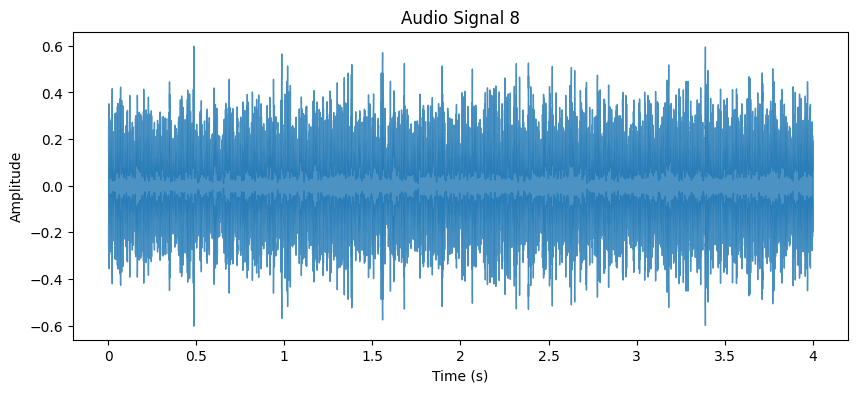

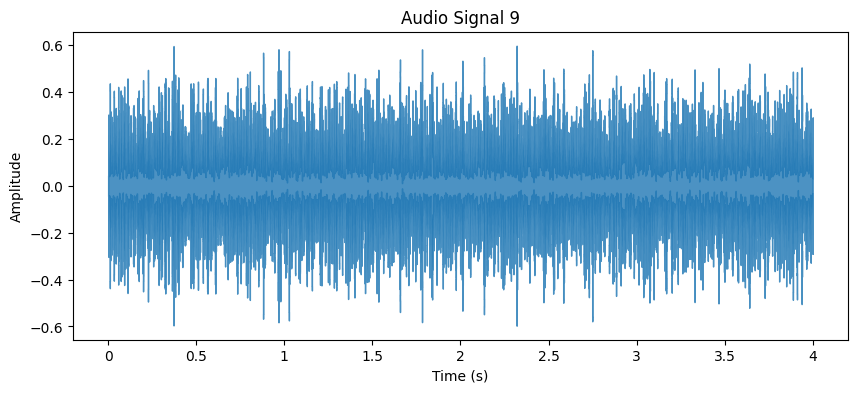

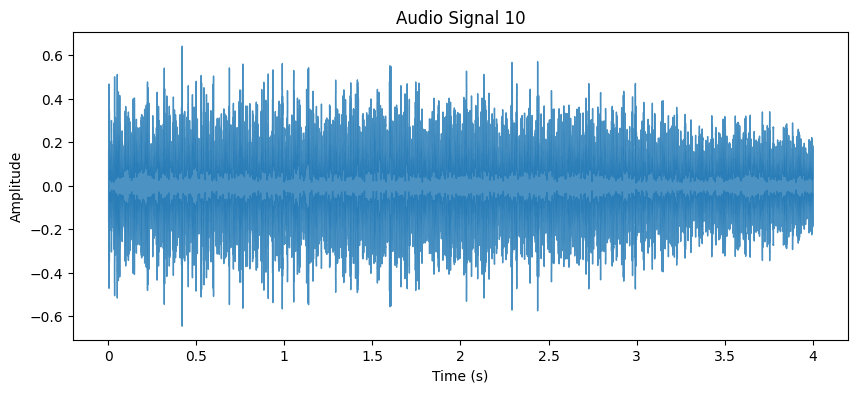

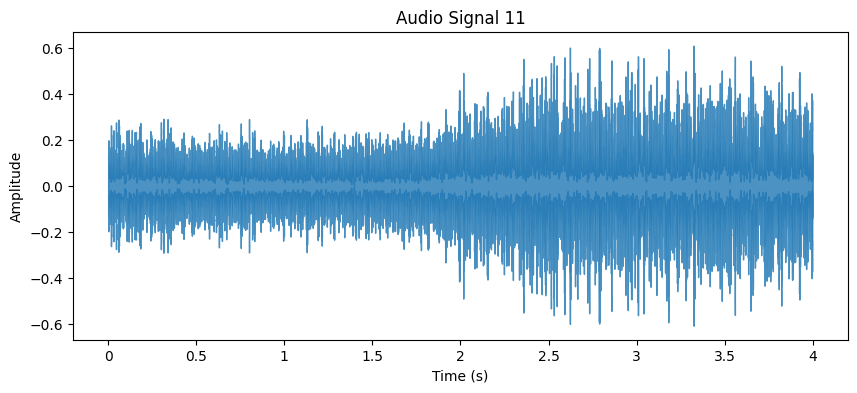

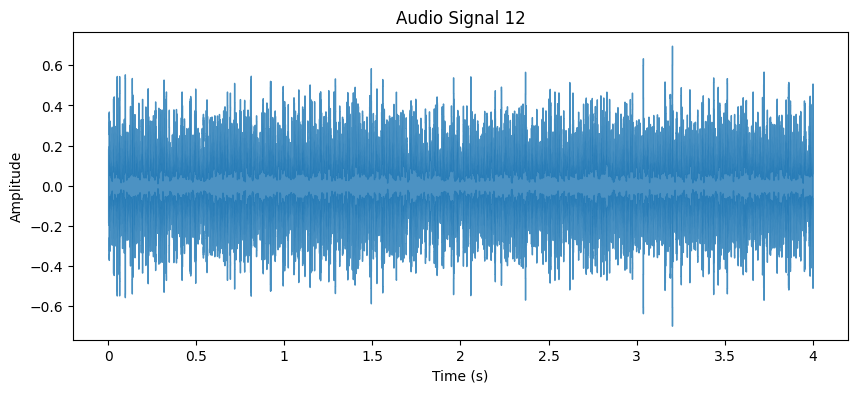

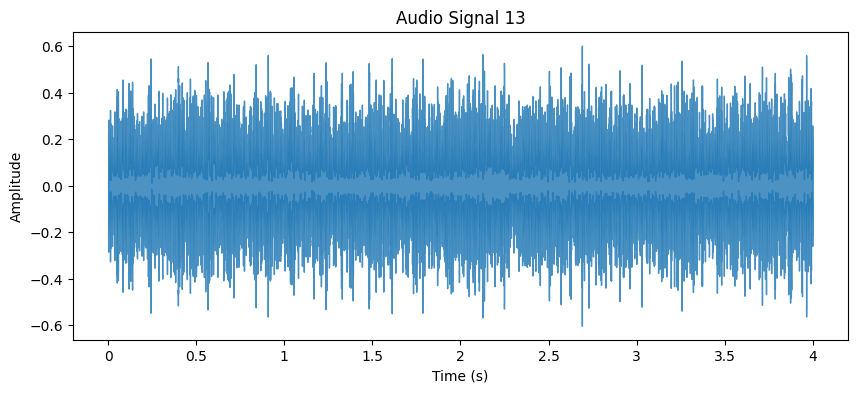

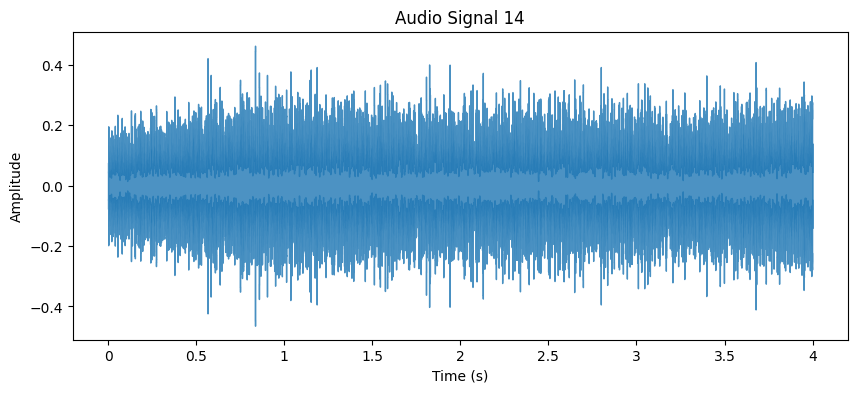

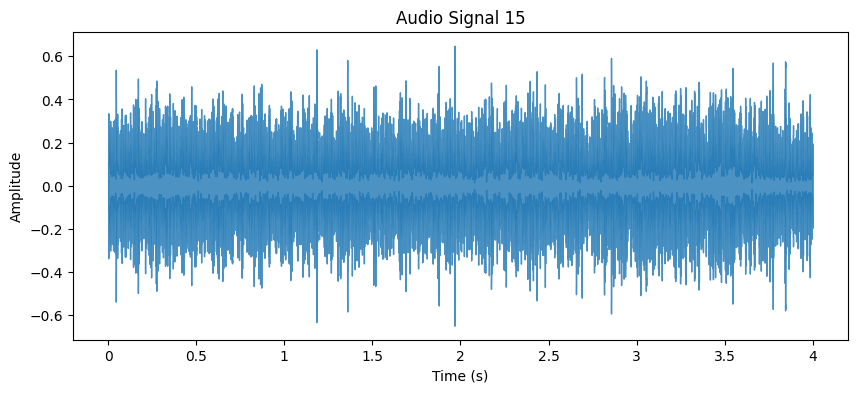

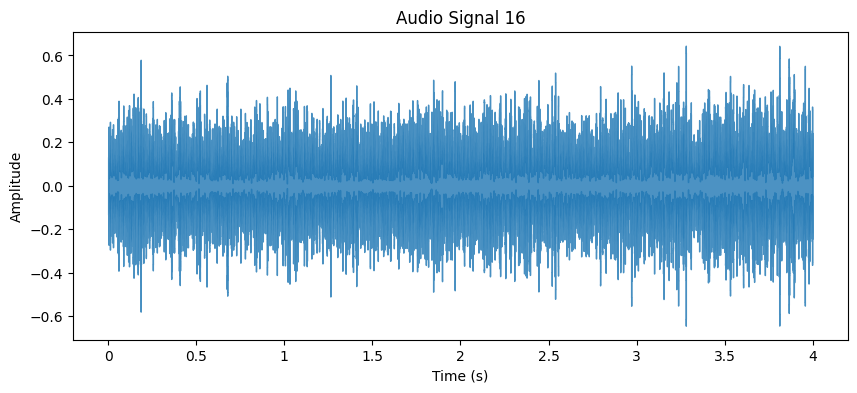

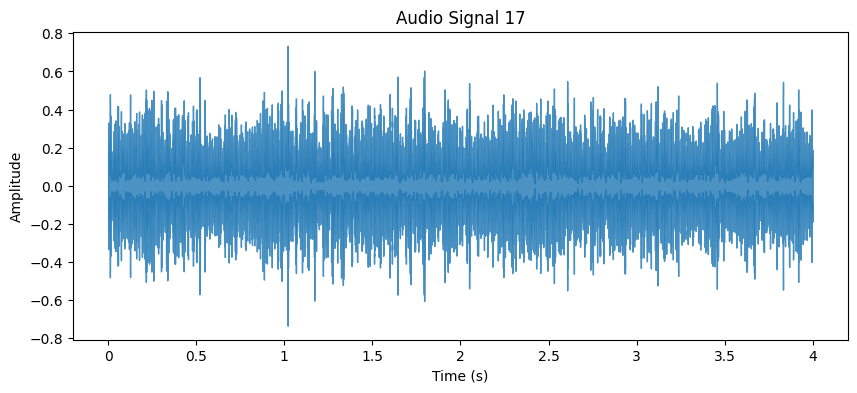

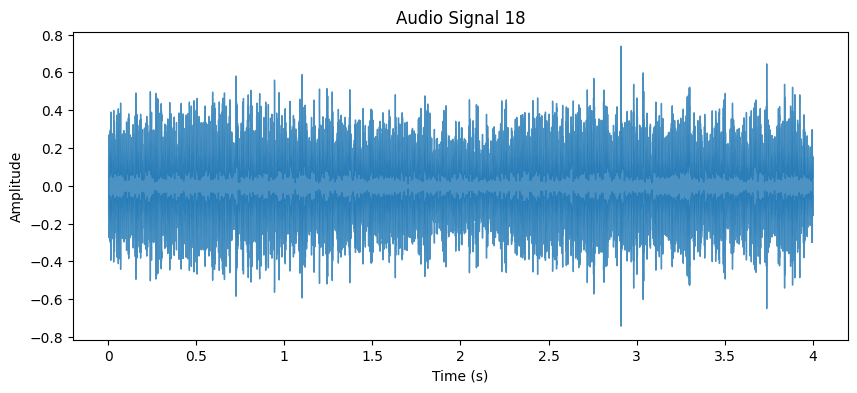

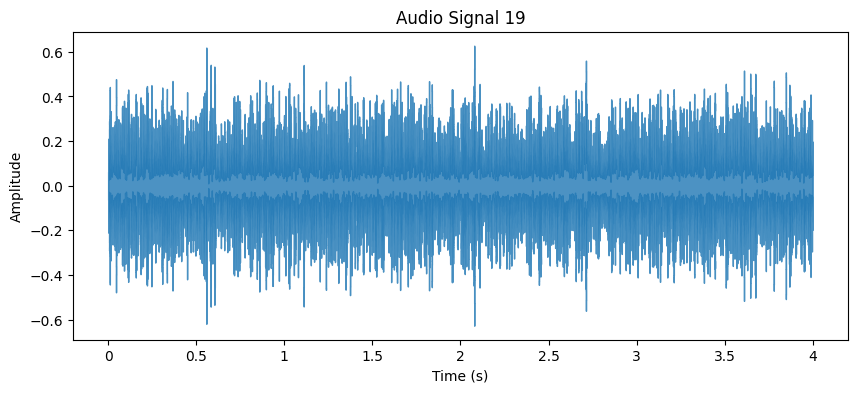

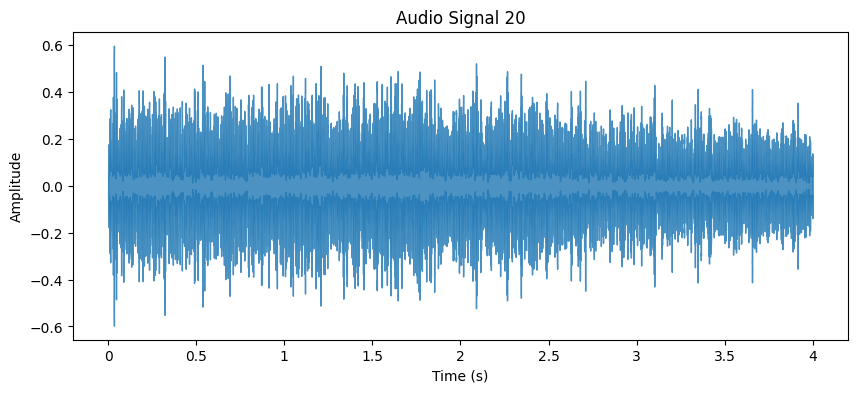

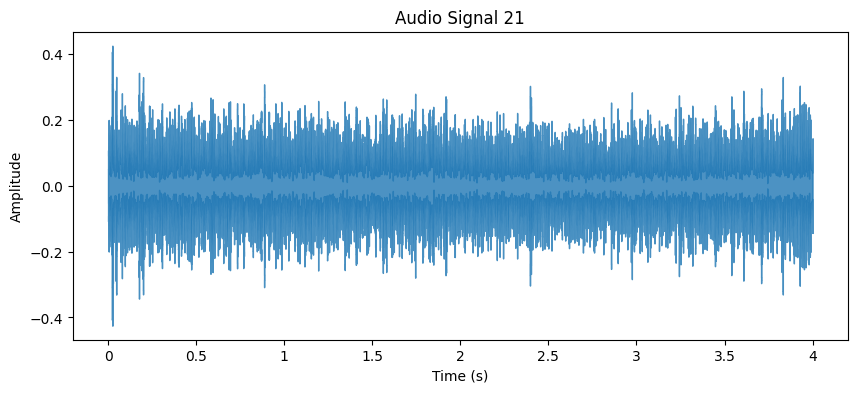

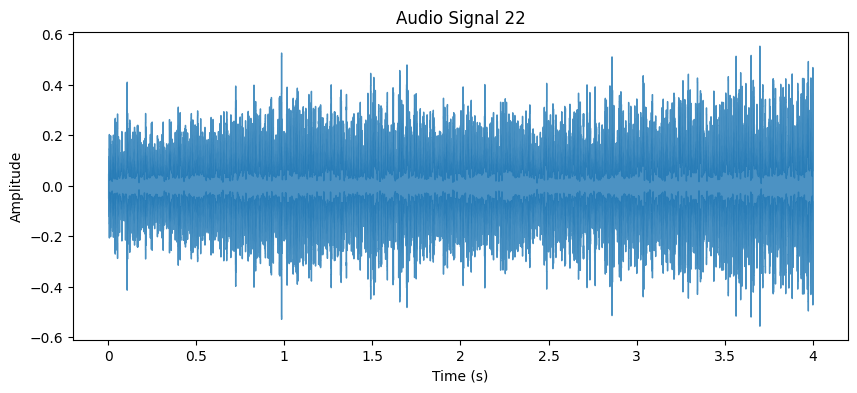

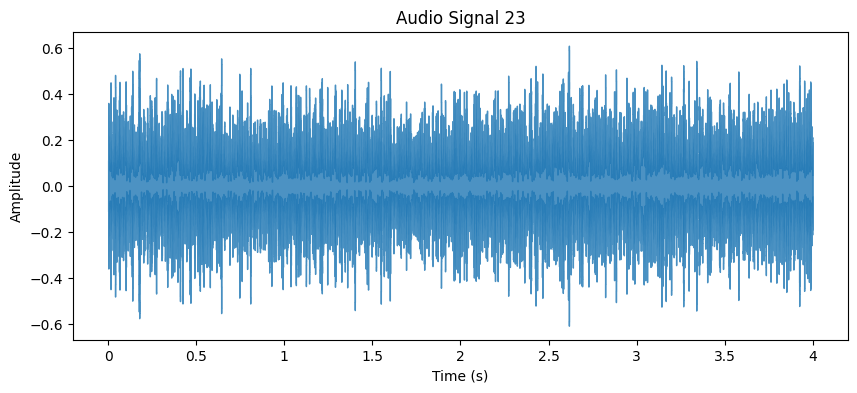

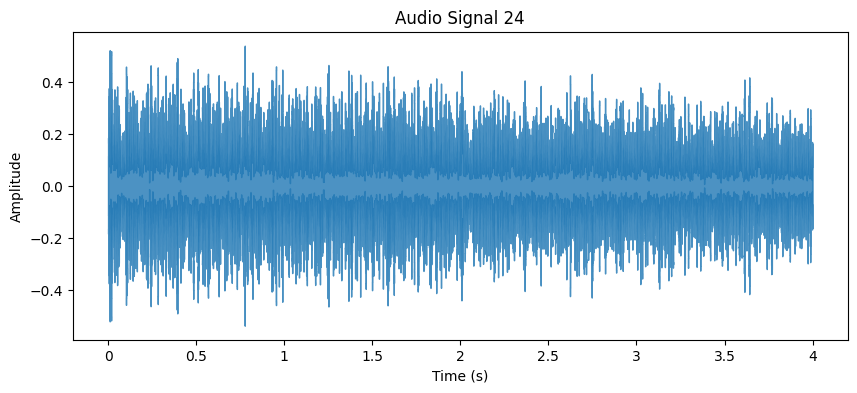

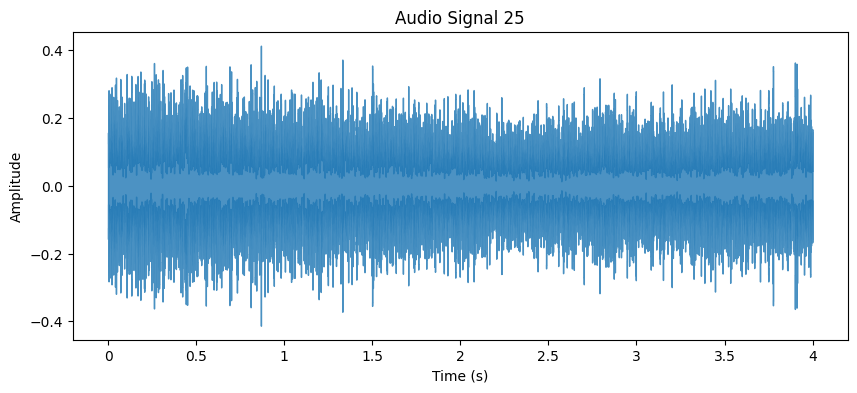

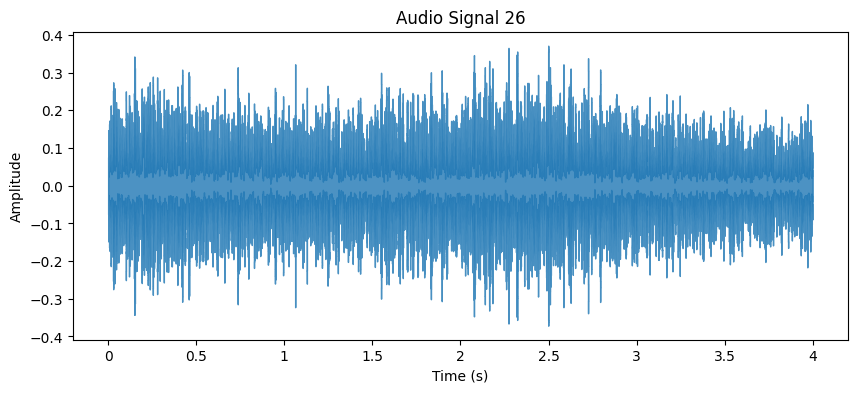

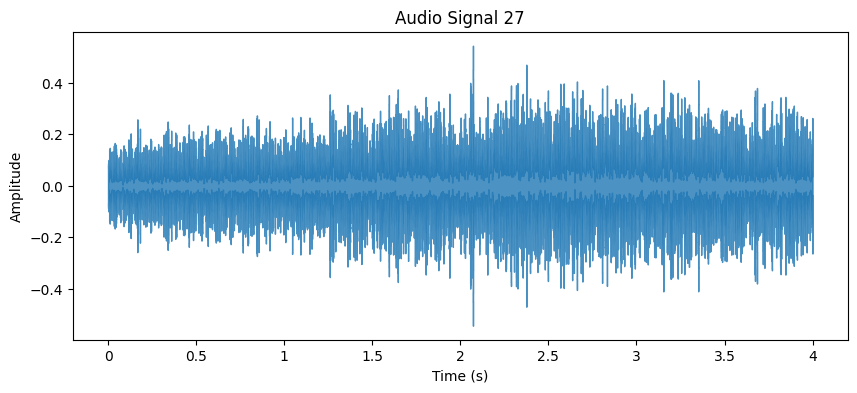

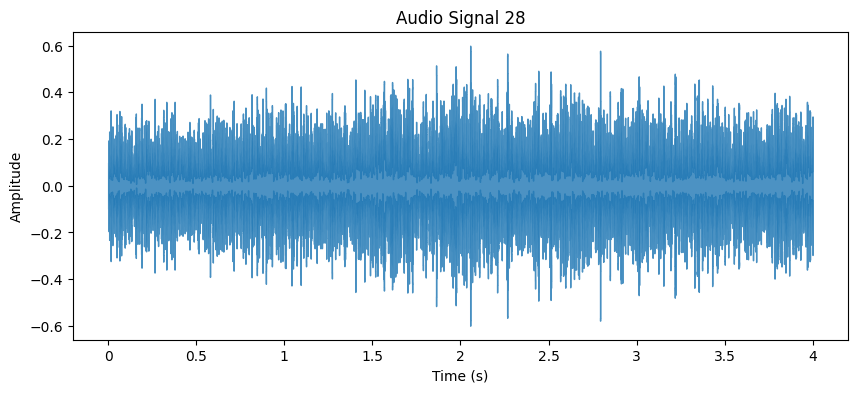

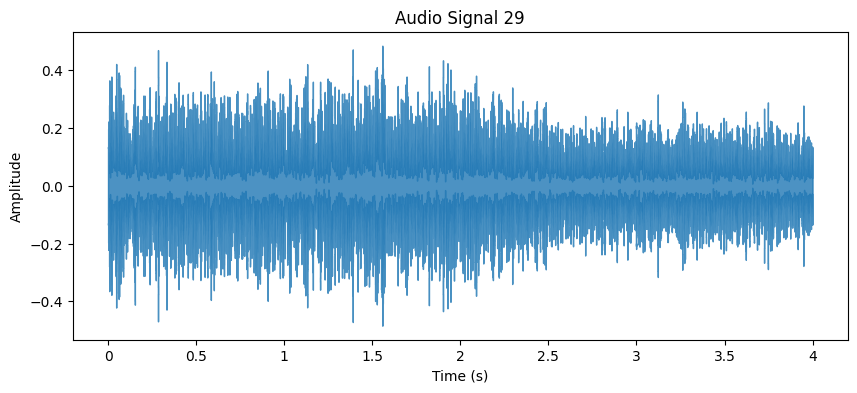

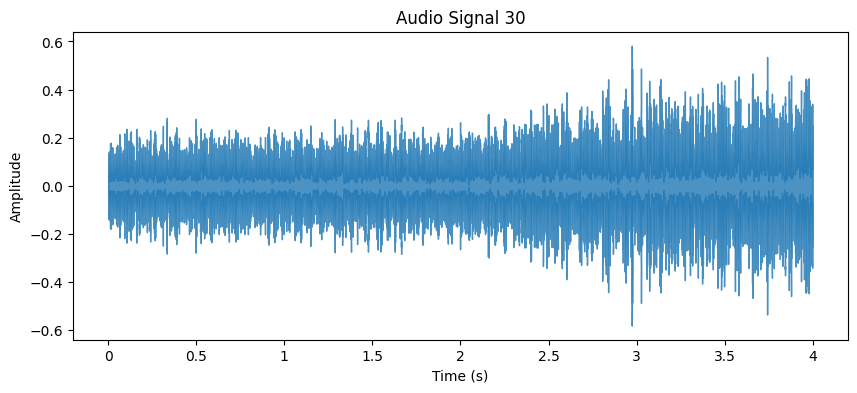

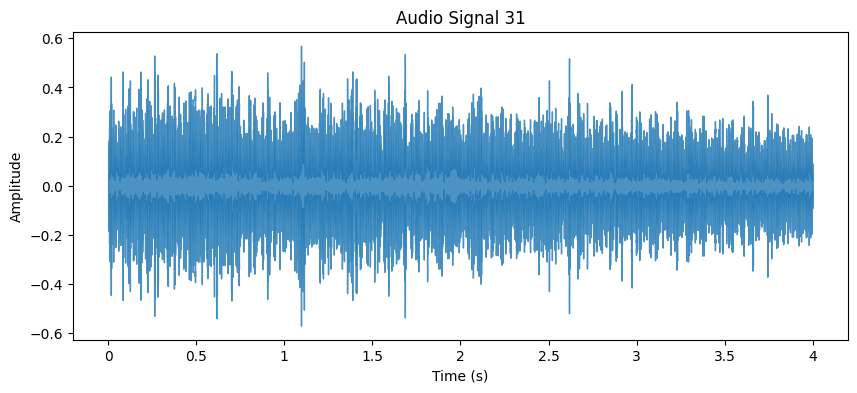

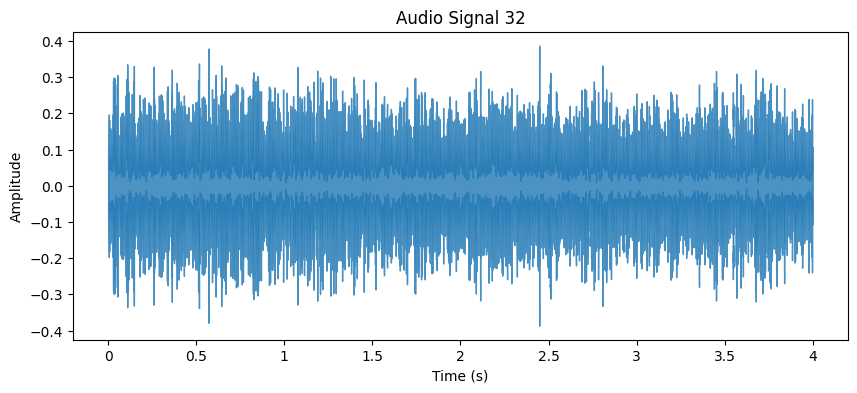

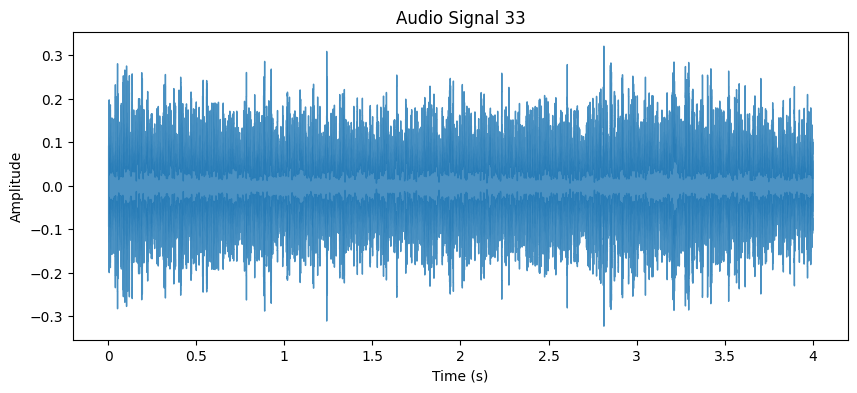

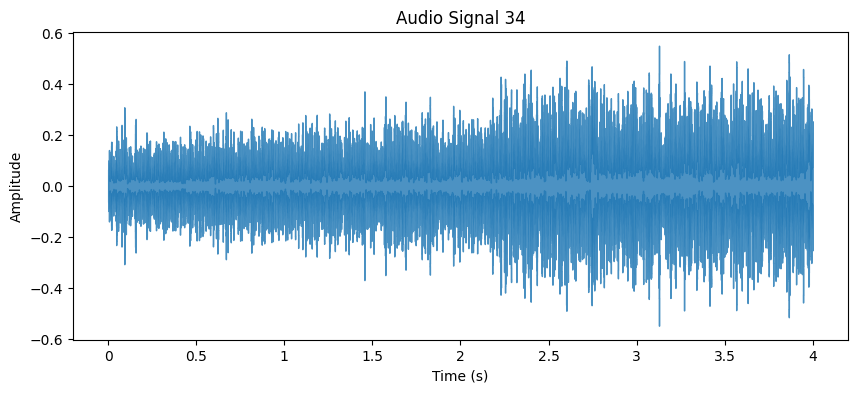

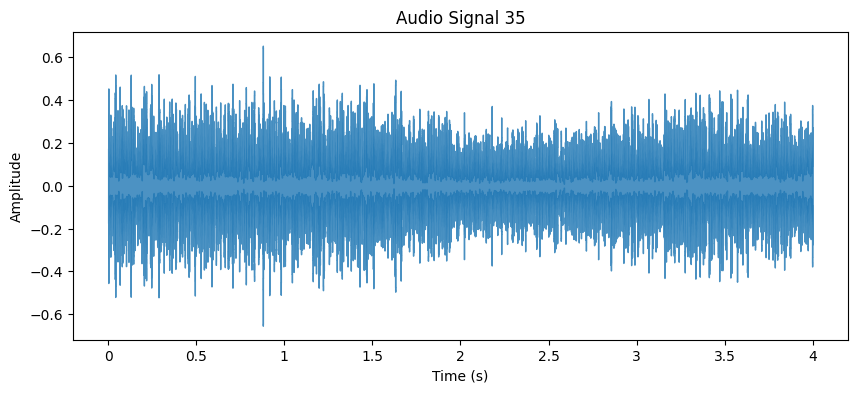

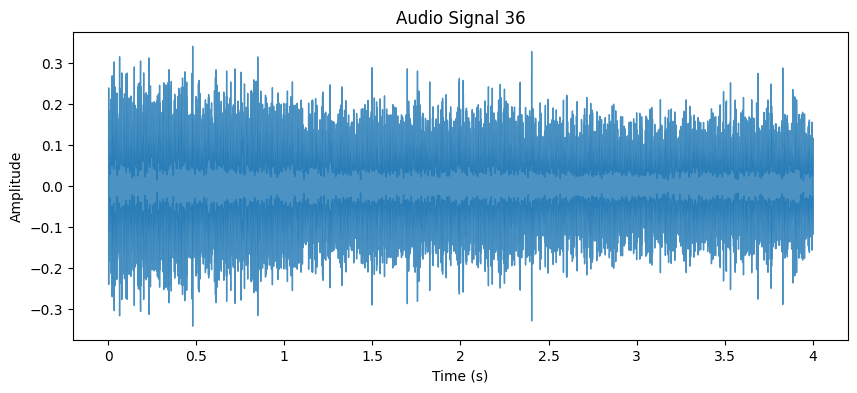

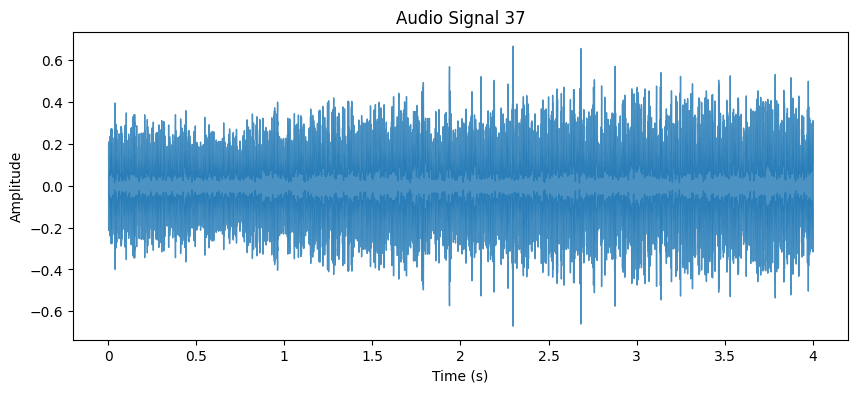

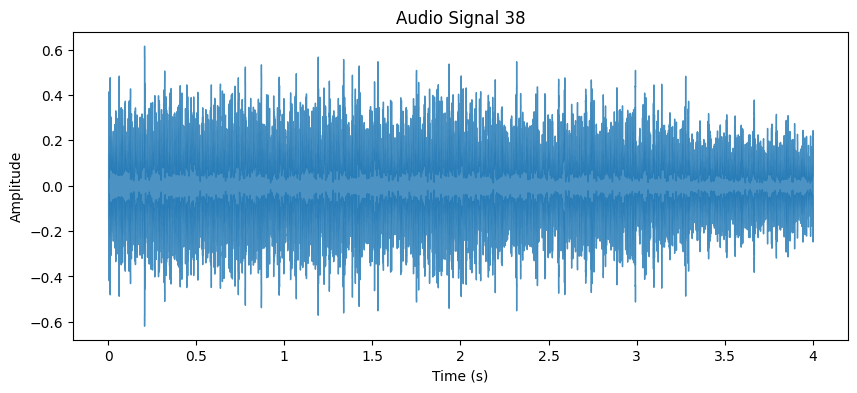

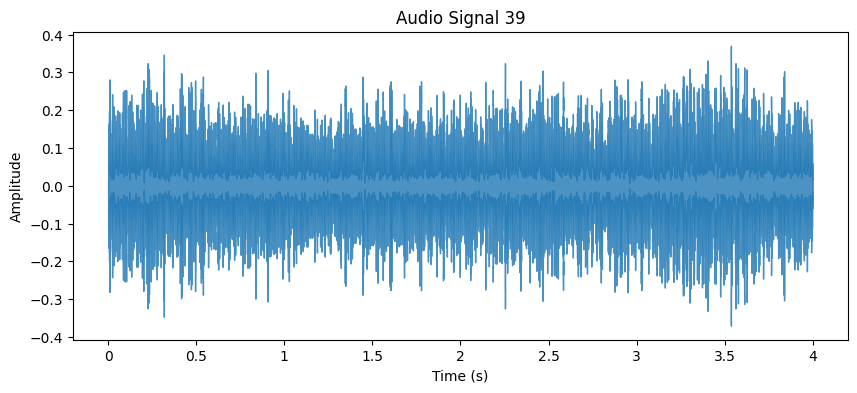

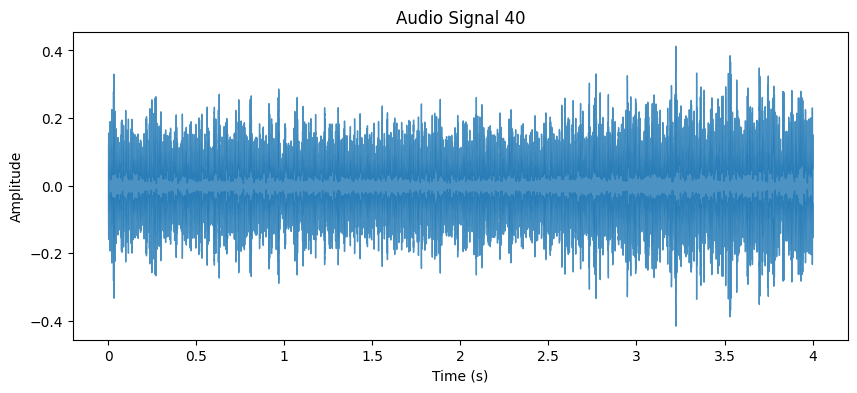

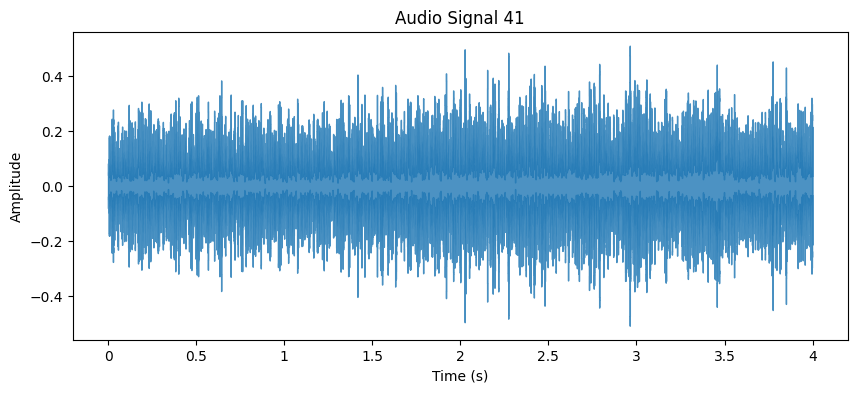

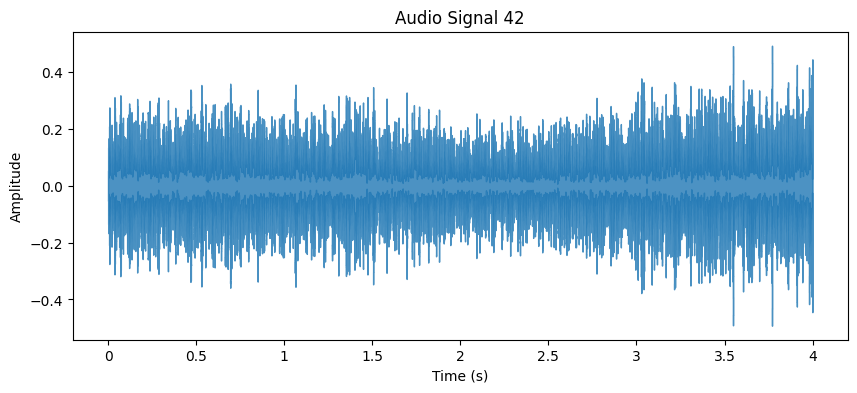

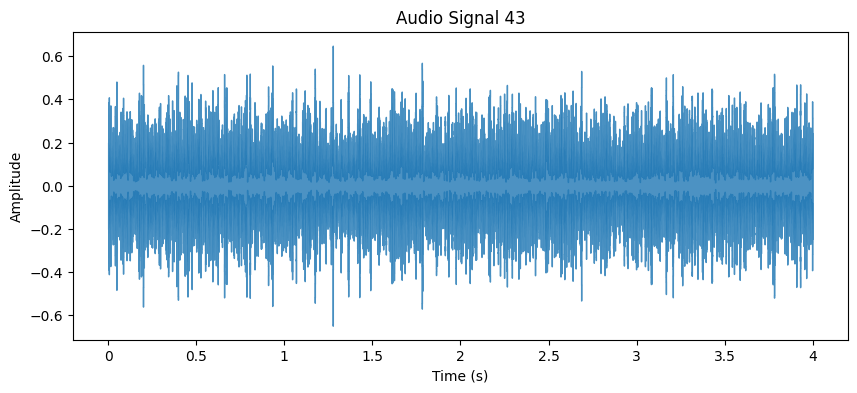

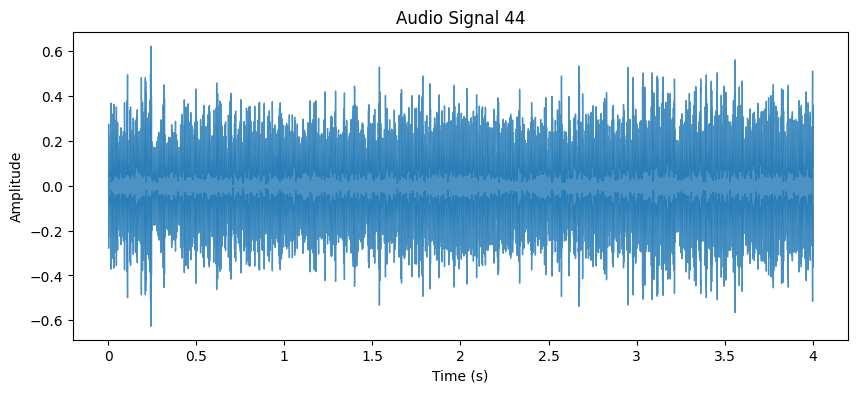

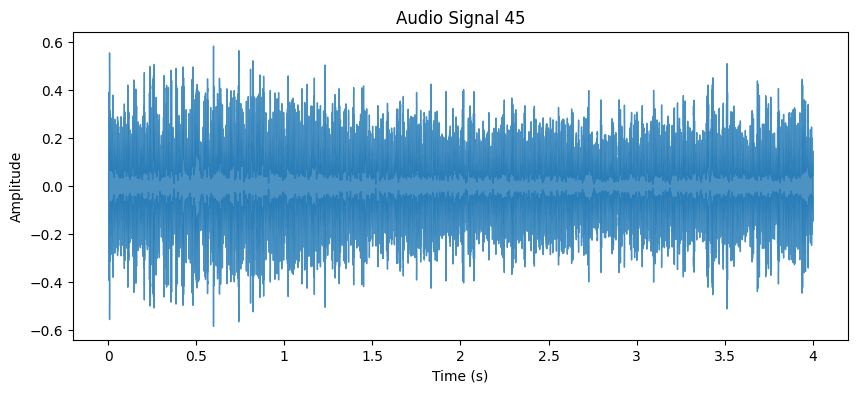

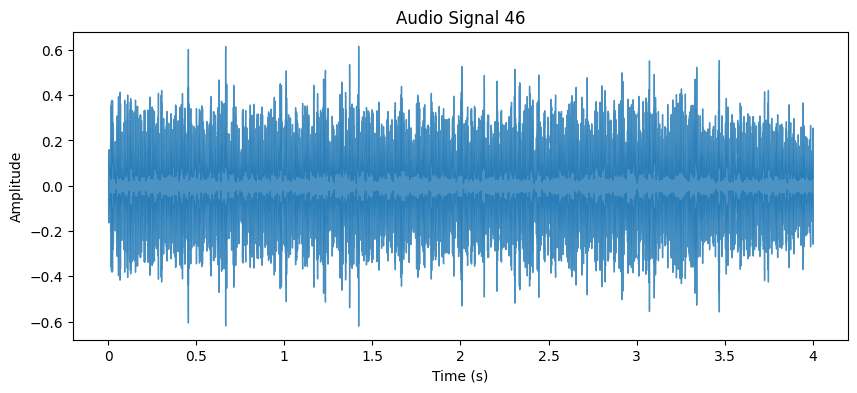

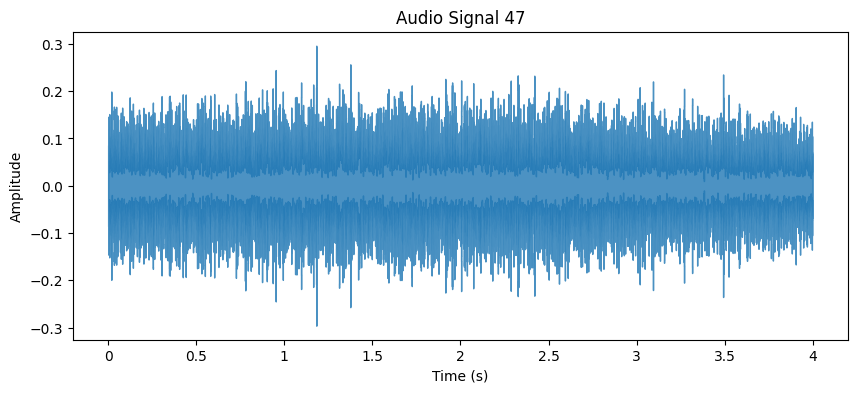

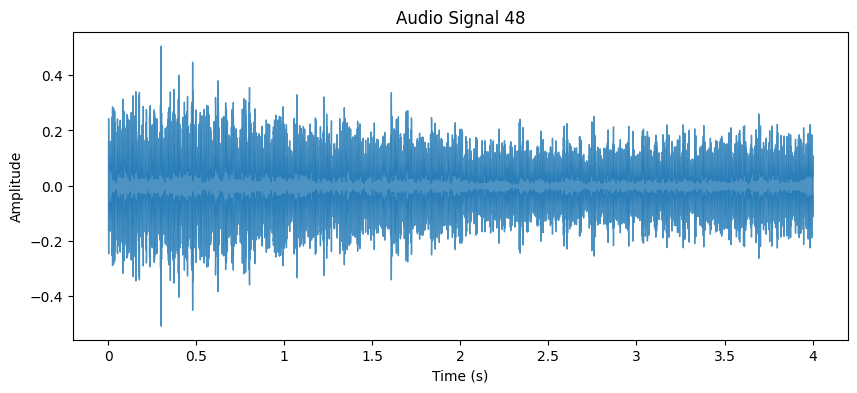

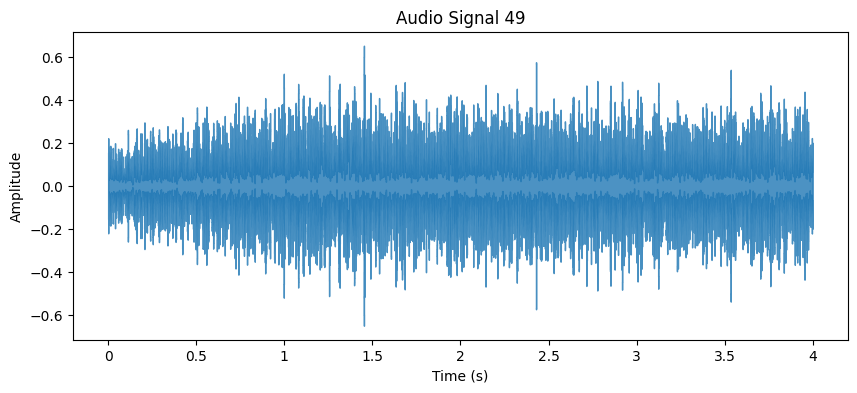

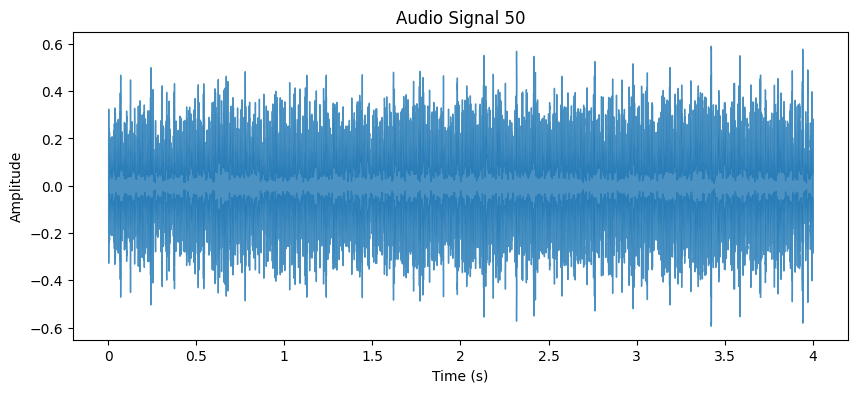

In [16]:


import matplotlib.pyplot as plt
import librosa.display

def visualize_audio_signals(audio_data, duration=5, max_images=50):
    count = 0
    for audio, sr in audio_data:
        if count >= max_images:
            break

        # Take a chunk of the audio (first 'duration' seconds)
        audio_chunk = audio[:int(sr * duration)]

        # Create time axis
        time_axis = librosa.times_like(audio_chunk, sr=sr)

        # Plot the audio signal
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio_chunk, sr=sr, alpha=0.8)
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.title(f"Audio Signal {count + 1}")
        plt.show()

        count += 1

 #Example usage
# `audio_data` is already defined as a list of tuples with audio and sample rate
visualize_audio_signals(audio_data)

In [17]:
# Filter audio data (e.g., lowpass filtering with cutoff frequency of 1500 Hz)
filtered_audio_data = filter_audio(audio_data, cutoff_freq=1500, filter_type='lowpass')

In [18]:
# Save filtered audio to new files
save_filtered_audio(filtered_audio_data, Filtered_Audio)

: 